## Importing necessary libraries

In [156]:
import lightningchart as lc
import pandas as pd

In [157]:
with open("license_key.txt", "r") as file:  # License key is stored in 'license_key.txt'
    key = file.read()
lc.set_license(key)

## Create dataframe from file

We need to convert the `.csv` file to `dataframe`, to make it readable for `pandas` library

In [158]:
df = pd.read_csv("data/thyroidDF.csv")  # the file is located under /data directory 
# We can than view df by just typing variable name inside cell
df 

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,target,patient_id
0,29,F,f,f,f,f,f,f,f,t,...,NaN,f,NaN,f,NaN,f,NaN,other,-,840801013
1,29,F,f,f,f,f,f,f,f,f,...,128.0,f,NaN,f,NaN,f,NaN,other,-,840801014
2,41,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,11.0,other,-,840801042
3,36,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,26.0,other,-,840803046
4,32,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,36.0,other,S,840803047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9167,56,M,f,f,f,f,f,f,f,f,...,64.0,t,0.83,t,77.0,f,NaN,SVI,-,870119022
9168,22,M,f,f,f,f,f,f,f,f,...,91.0,t,0.92,t,99.0,f,NaN,SVI,-,870119023
9169,69,M,f,f,f,f,f,f,f,f,...,113.0,t,1.27,t,89.0,f,NaN,SVI,I,870119025
9170,47,F,f,f,f,f,f,f,f,f,...,75.0,t,0.85,t,88.0,f,NaN,other,-,870119027


> Note: you can review the dataset parameters (features) here: [Kaggle.com](https://www.kaggle.com/datasets/emmanuelfwerr/thyroid-disease-data)

## Data cleaning
Firstly, we need to check the datatypes and how many NaN (not a number, null) values each column contains

In [159]:
df.info()
print(df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9172 entries, 0 to 9171
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  9172 non-null   int64  
 1   sex                  8865 non-null   object 
 2   on_thyroxine         9172 non-null   object 
 3   query_on_thyroxine   9172 non-null   object 
 4   on_antithyroid_meds  9172 non-null   object 
 5   sick                 9172 non-null   object 
 6   pregnant             9172 non-null   object 
 7   thyroid_surgery      9172 non-null   object 
 8   I131_treatment       9172 non-null   object 
 9   query_hypothyroid    9172 non-null   object 
 10  query_hyperthyroid   9172 non-null   object 
 11  lithium              9172 non-null   object 
 12  goitre               9172 non-null   object 
 13  tumor                9172 non-null   object 
 14  hypopituitary        9172 non-null   object 
 15  psych                9172 non-null   o

From the result, we can conclude that `TBG` column has a very small amount of non-null values.

There are 2 ways to deal with it:
1. We can ignore or/and delete this column as a whole
2. We can analyze the 349 present values, but the result would be quite insignificant, due to the number of samples

I think it is unreasonable to deal with such low amount, so we will drop it in the analysis (however, you can experiment yourself!).

In [160]:
df = df.drop('TBG', axis=1)

Also, we don't need a number of columns that don't mean anything significant number or class-wise. We can drop them.

In [161]:
df.drop(['TSH_measured','T3_measured','TT4_measured','T4U_measured','FTI_measured','TBG_measured'
,'referral_source','patient_id'],axis=1 ,inplace=True)
df.shape  # (a, b) where a = rows, b = cols

(9172, 22)

Now we can think about `T3` column.

It has around 2600 NaN values. This is not reasonable to delete this column as a whole, as it is (only) ~30% of all entries.

Again, there are 2 way to deal with it:
1. We can delete entries where `T3=NaN`
2. We can leave it as it is

I think it is not reasonable enough to delete entries as a whole, but we still need to get rid of rows with multiple `Na` values. We can do this trick: 

In [162]:
df = df.dropna(subset=df.columns.difference(['T3']))
df.shape

(7652, 22)

As we can see, we removed only around 1500 entries

In [163]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,7652.0,78.827365,1296.169513,1.000,38.0000,56.00,69.0000,65526.00
TSH,7652.0,5.173127,24.181834,0.005,0.4375,1.30,2.7000,530.00
T3,5789.0,1.948817,0.872959,0.050,1.5000,1.90,2.3000,18.00
TT4,7652.0,108.827543,37.419306,2.000,88.0000,105.00,126.0000,600.00
T4U,7652.0,0.977814,0.198786,0.170,0.8600,0.96,1.0625,2.33
FTI,7652.0,112.890805,36.970210,1.400,94.0000,109.00,128.0000,642.00


We can see from this table that `age` has some suspicious values, so we remove these entries by filtering by `age` column.

In [164]:
df = df[df['age'] < 100]
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,7648.0,53.109702,18.798502,1.000,38.00,56.00,69.00,97.00
TSH,7648.0,5.175439,24.187943,0.005,0.44,1.35,2.70,530.00
T3,5786.0,1.948652,0.873113,0.050,1.50,1.90,2.30,18.00
TT4,7648.0,108.822354,37.427958,2.000,88.00,105.00,126.00,600.00
T4U,7648.0,0.977793,0.198820,0.170,0.86,0.96,1.06,2.33
FTI,7648.0,112.888394,36.978425,1.400,94.00,109.00,128.00,642.00


In [165]:
df.describe(include=[object]).T

,count,unique,top,freq
sex,7648,2,F,5219
on_thyroxine,7648,2,f,6545
query_on_thyroxine,7648,2,f,7562
on_antithyroid_meds,7648,2,f,7547
sick,7648,2,f,7352
pregnant,7648,2,f,7555
thyroid_surgery,7648,2,f,7529
I131_treatment,7648,2,f,7494
query_hypothyroid,7648,2,f,7106
query_hyperthyroid,7648,2,f,7135


### Outcome analysis/mapping etc

In [166]:
df['target'].unique()  # list unique outcomes present in dataset

array(['F', '-', 'AK', 'R', 'I', 'M', 'N', 'G', 'K', 'L', 'MK', 'A', 'Q',
       'J', 'C|I', 'O', 'H|K', 'GK', 'MI', 'KJ', 'P', 'FK', 'B', 'GI',
       'C', 'GKJ', 'OI', 'D'], dtype=object)

We now got the outcomes. After this, we can filter the df to contain only outcomes, related to the hypo- and hyperthyroid conditions.

Target metadata *(from kaggle)*:
```
The diagnosis consists of a string of letters indicating diagnosed conditions.
A diagnosis "-" indicates no condition requiring comment.  A diagnosis of the
form "X|Y" is interpreted as "consistent with X, but more likely Y".  The
conditions are divided into groups where each group corresponds to a class of
comments.
Letter  Diagnosis
------  ---------
hyperthyroid conditions:
A   hyperthyroid
B   T3 toxic
C   toxic goitre
D   secondary toxic

hypothyroid conditions:
E   hypothyroid
F   primary hypothyroid
G   compensated hypothyroid
H   secondary hypothyroid

binding protein:
I   increased binding protein
J   decreased binding protein

general health:
K   concurrent non-thyroidal illness

replacement therapy:
L   consistent with replacement therapy
M   underreplaced
N   overreplaced

antithyroid treatment:
O   antithyroid drugs
P   I131 treatment
Q   surgery

miscellaneous:
R   discordant assay results
S   elevated TBG
T   elevated thyroid hormones
```
As we are not interested in miscellaneous results, we need the values ranging from `A` to `H` (first letter if there are more than 1) or `-`

In [167]:
df = df[df['target'].isin(['A', 'AK', 'B', 'C', 'C|I', 'D', 'D|R', 'E', 'F', 'FK', 'G', 'GI', 'GKJ', 'GK', 'H', 'H|K', '-'])]

values_map = {
    '-':"Negative", 
    'A':'Hyperthyroid','AK':"Hyperthyroid",'B':"Hyperthyroid", 'C':"Hyperthyroid",'C|I': 'Hyperthyroid', 'D':"Hyperthyroid", 'D|R':"Hyperthyroid",
    'E': "Hypothyroid", 'F': "Hypothyroid", 'FK': "Hypothyroid", "G": "Hypothyroid", "GK": "Hypothyroid", "GI": "Hypothyroid", 'GKJ': 'Hypothyroid', 'H|K': 'Hypothyroid',
}
df['target'] = df['target'].map(values_map)
df['target']

18      Hypothyroid
19         Negative
21         Negative
22         Negative
23         Negative
           ...     
9151       Negative
9152       Negative
9154       Negative
9155       Negative
9156       Negative
Name: target, Length: 6361, dtype: object

We can also note that the number of entries doesn't differ a lot, so we didn't filter too much (only ~17%).

The next logical step is to analyze the number of each outcome. We will use Pie Chart.

In [168]:
data_pie = [
    {'name': 'Negative', 'value': int((df['target']=="Negative").sum())},
    {'name': 'Hyperthyroid', 'value': int((df['target']=="Hyperthyroid").sum())},
    {'name': 'Hypothyroid', 'value': int((df['target']=="Hypothyroid").sum())}
]
pie_chart = lc.PieChart(
    labels_inside_slices=False,
    title='Disease Count',
    theme=lc.Themes.White
)
pie_chart.add_slices(data_pie)
#chart.set_inner_radius(50)
pie_chart.open()

In [169]:
outcome_counts_by_sex = df.groupby(['sex', 'target'], observed=True).size().unstack(fill_value=0)
outcome_counts_by_sex

target,Hyperthyroid,Hypothyroid,Negative
sex,,,
F,155,465,3658
M,34,132,1917


Next, we will make a Stacked Bar Chart based on sex.

In [170]:
result = []
for target in df['target'].unique():  # make json-like formation of data
    values = outcome_counts_by_sex[target].tolist()   
    result.append({                     
        'subCategory': target,
        'values': values
    })
barchart_stacked = lc.BarChart(  # initialize bar chart
    vertical=True,
    theme=lc.Themes.White,
    title='Diagnosis By Sex',
)
barchart_stacked.set_data_stacked(df['sex'].unique().tolist(), result)  # set data
barchart_stacked.add_legend().add(barchart_stacked)  # add legend
barchart_stacked.open()    

### Grouped bar chart for age

In [171]:
bins = [0, 40, 60, 100]  
labels = ['0-40', '41-60', '61-100']

df["age_range"] = pd.cut(df["age"], bins=bins, labels=labels, right=True)
df

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,target,age_range
18,63,F,t,f,f,t,f,f,f,f,...,f,f,f,68.00,NaN,48.0,1.02,47.0,Hypothyroid,61-100
19,36,F,f,f,f,f,f,f,f,t,...,f,f,f,1.50,2.4,90.0,1.06,85.0,Negative,0-40
21,40,F,f,f,f,f,f,f,f,f,...,f,f,f,1.20,2.3,104.0,1.08,96.0,Negative,0-40
22,40,F,f,f,f,f,f,f,f,f,...,f,f,f,5.90,2.1,88.0,0.84,105.0,Negative,0-40
23,77,F,f,f,f,f,f,f,f,f,...,f,f,f,0.05,2.4,107.0,1.13,95.0,Negative,61-100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9151,84,F,f,f,f,f,f,f,f,f,...,f,f,f,0.34,NaN,105.0,0.93,113.0,Negative,61-100
9152,80,M,f,f,f,f,f,f,f,f,...,f,f,f,3.30,NaN,111.0,0.92,121.0,Negative,61-100
9154,16,M,f,f,f,f,f,f,f,f,...,f,f,f,2.60,NaN,122.0,0.86,142.0,Negative,0-40
9155,54,M,f,f,f,f,f,f,f,f,...,f,f,f,1.10,NaN,105.0,0.82,128.0,Negative,41-60


In [172]:
outcome_counts_by_age = df.groupby(['age_range', 'target'], observed=True).size().unstack(fill_value=0)
outcome_counts_by_age

target,Hyperthyroid,Hypothyroid,Negative
age_range,,,
0-40,62,140,1585
41-60,66,187,1795
61-100,61,270,2195


In [173]:
result = []
for target in df['target'].unique():  # make json-like formation of data
    values = outcome_counts_by_age[target].tolist()   
    result.append({                     
        'subCategory': target,
        'values': values
    })
barchart_grouped = lc.BarChart(  # initialize bar chart
    vertical=True,
    theme=lc.Themes.White,
    title='Diagnosis By Age',
)
barchart_grouped.set_data_grouped(labels, result)  # set data
barchart_grouped.set_sorting('alphabetical').set_animation_category_position(False)
barchart_grouped.add_legend().add(barchart_grouped)  # add legend
barchart_grouped.open() 

## Box plots

In [174]:
df_for_t3 = df.dropna(subset=['T3'])
t3_val_neg = df_for_t3[df_for_t3['target'] == 'Negative']['T3'].tolist()
t3_val_hyper = df_for_t3[df_for_t3['target'] == 'Hyperthyroid']['T3'].tolist()
t3_val_hypo = df_for_t3[df_for_t3['target'] == 'Hypothyroid']['T3'].tolist()
boxplt_t3 = lc.BoxPlot(  # init box plot
    data=[t3_val_neg, t3_val_hyper, t3_val_hypo],
    theme=lc.Themes.White,
    title='T3',
    xlabel='Negative (Left), Hyperthyroid (Middle), Hypotyroid (Right)',
    ylabel='Values'
)
boxplt_t3.open()


In [175]:
tsh_val_neg = df[df['target'] == 'Negative']['TSH'].tolist()
tsh_val_hyper = df[df['target'] == 'Hyperthyroid']['TSH'].tolist()
tsh_val_hypo = df[df['target'] == 'Hypothyroid']['TSH'].tolist()
boxplt_tsh = lc.BoxPlot(  # init box plot
    data=[tsh_val_neg, tsh_val_hyper, tsh_val_hypo],
    theme=lc.Themes.White,
    title='TSH',
    xlabel='Negative (Left), Hyperthyroid (Middle), Hypotyroid (Right)',
    ylabel='Values'
)
boxplt_tsh.open()

## Correlation matrix

In [176]:
numeric_columns = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']
data_numeric = df[numeric_columns]

In [177]:
correlation_matrix = data_numeric.corr()
print(correlation_matrix)

          age       TSH        T3       TT4       T4U       FTI
age  1.000000 -0.020178 -0.185715 -0.031869 -0.097642  0.022881
TSH -0.020178  1.000000 -0.201585 -0.324683  0.105799 -0.341080
T3  -0.185715 -0.201585  1.000000  0.570440  0.207202  0.492500
TT4 -0.031869 -0.324683  0.570440  1.000000  0.302134  0.834241
T4U -0.097642  0.105799  0.207202  0.302134  1.000000 -0.232331
FTI  0.022881 -0.341080  0.492500  0.834241 -0.232331  1.000000


Based on above correlation matrix, you can see how the variables correlate between each other.

Numbers represent strength of correlation:
- 0.7 to 1.0 (-0.7 to -1.0) -> Strong correlation.
- 0.5 to 0.7 (-0.5 to -0.7) -> Moderate correlation.
- 0.3 to 0.5 (-0.3 to -0.5) -> Weak correlation.
- 0.0 to 0.3 (0.0 to -0.3)  -> Negligible correlation.

Positive numbers mean positive correlation (as one value increases, the other does too). \
Negative numbers mean negative correlation (as one value increases, the other decreases).

For example, features `FTI` and `TT4` correlate strongly, while `age` and `TSH` don't correlate at all.

In [178]:
from imblearn.over_sampling import SMOTE

columns = ['age', 'pregnant', 'TT4', 'T3', 'T4U', 'FTI', 'TSH', 'target']  # these will be our features + target 
training_df = df.loc[:, columns]  # extract needed columns

training_df['pregnant'] = training_df['pregnant'].replace({'t': 1, 'f': 0})  # letters to num (readable for SVM)
training_df['target'] = training_df['target'].replace({'Negative': 0, 'Hypothyroid':1,'Hyperthyroid':2})  # same with target

x = training_df.loc[:, training_df.columns != 'target']  # features
y = training_df['target']  # columns


/var/folders/3s/8g7g4xyx7lbgtjl6d8t1k6sh0000gn/T/ipykernel_36799/385496267.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  training_df['pregnant'] = training_df['pregnant'].replace({'t': 1, 'f': 0})  # letters to num (readable for SVM)
/var/folders/3s/8g7g4xyx7lbgtjl6d8t1k6sh0000gn/T/ipykernel_36799/385496267.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  training_df['target'] = training_df['target'].replace({'Negative': 0, 'Hypothyroid':1,'Hyperthyroid':2})  # same with target


Then, we need to split data to training and testing samples. After it, we can finally create a model. \
We will also visualize a learning curve for the model which shows how the training and validation scores change with varying amounts of training data.

## Prediction Modelling

For modelling, we will use XGBoOST Classifier. It is like sklearn with a few tweaks:
- It can automatically handle missing values. No need to manually delete entries or make evaluations for NaN
- It can handle class imbalance using `sample_weight` parameter

The model will build a decision tree based on parameters, we will also see how features contribute to the result.

In [179]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=52)  # dividing samples to test values and train values

In [190]:
from xgboost import XGBClassifier
from sklearn.utils.class_weight import compute_sample_weight

sample_weights = compute_sample_weight(  # we use sklearn's
    class_weight='balanced',
    y=y_train
)

XGB = XGBClassifier(  # you can experiment with values, refer to the XGB docs
    objective='multi:softmax', 
    missing=1, 
    early_stopping_rounds=15,
    learning_rate=0.1,
    max_depth=5,  
    eval_metric=['merror','mlogloss'], 
    seed=52
)

XGB.fit(x_train, y_train, eval_set=[(x_train, y_train), (x_test, y_test)], sample_weight=sample_weights)  # train the model
results = XGB.evals_result()
epochs = len(results['validation_0']['mlogloss'])
x_values = list(range(0, epochs))

dashboard_XGB = lc.Dashboard(columns=1, rows=2)  # create a dashboard as we need 2 charts

chartMlog = dashboard_XGB.ChartXY(  # first chart
    column_index=0, 
    row_index=0,
    title='Logarithmic Loss'
)
series_train = chartMlog.add_line_series().append_samples(  # series with train results
    x_values=x_values,
    y_values=results['validation_0']['mlogloss']
).set_name("Train").set_line_color(lc.Color(100, 200, 250))

series_test = chartMlog.add_line_series().append_samples(  # series with test results
    x_values=x_values,
    y_values=results['validation_1']['mlogloss']
).set_name("Test").set_line_color(lc.Color(255, 165, 0))

chartMlog.get_default_x_axis().set_title("epoch")
chartMlog.get_default_y_axis().set_title("mlogloss")
chartMlog.add_legend().add(chartMlog)


chartMerror = dashboard_XGB.ChartXY(  # same for 2nd chart
    column_index=0, 
    row_index=1,
    title='Mean Error'
)
series_train1 = chartMerror.add_line_series().append_samples(
    x_values=x_values,
    y_values=results['validation_0']['merror']
).set_name("Train").set_line_color(lc.Color(100, 200, 250))

series_test1 = chartMerror.add_line_series().append_samples(
    x_values=x_values,
    y_values=results['validation_1']['merror']
).set_name("Test").set_line_color(lc.Color(255, 165, 0))

chartMerror.get_default_x_axis().set_title("epoch")
chartMerror.get_default_y_axis().set_title("merror")
chartMerror.add_legend().add(chartMlog)

dashboard_XGB.open()

[0]	validation_0-merror:0.01761	validation_0-mlogloss:0.95939	validation_1-merror:0.01948	validation_1-mlogloss:0.96023
[1]	validation_0-merror:0.02055	validation_0-mlogloss:0.84430	validation_1-merror:0.02577	validation_1-mlogloss:0.84583
[2]	validation_0-merror:0.01929	validation_0-mlogloss:0.74713	validation_1-merror:0.02514	validation_1-mlogloss:0.74930
[3]	validation_0-merror:0.01845	validation_0-mlogloss:0.66432	validation_1-merror:0.02263	validation_1-mlogloss:0.66706
[4]	validation_0-merror:0.01845	validation_0-mlogloss:0.59290	validation_1-merror:0.02263	validation_1-mlogloss:0.59622
[5]	validation_0-merror:0.01845	validation_0-mlogloss:0.53101	validation_1-merror:0.02263	validation_1-mlogloss:0.53488
[6]	validation_0-merror:0.01845	validation_0-mlogloss:0.47726	validation_1-merror:0.02263	validation_1-mlogloss:0.48183
[7]	validation_0-merror:0.01845	validation_0-mlogloss:0.43001	validation_1-merror:0.02263	validation_1-mlogloss:0.43510
[8]	validation_0-merror:0.01845	validati

Let's build a decision tree. We will use matplotlib for this chart.
> Make sure you have graphviz installed via pip **and** on your pc - `brew install graphviz` (Mac) or `winget install graphviz` (Win) or `apt install graphviz` (Ubuntu)

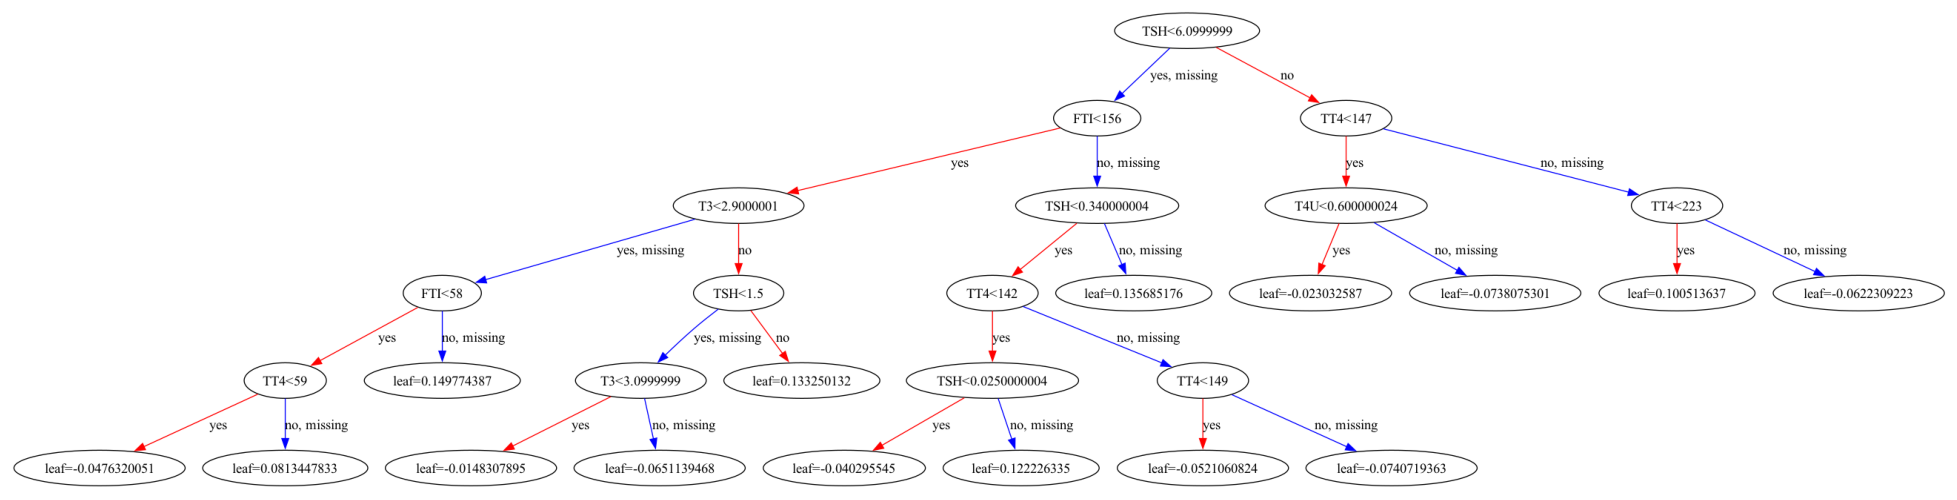

In [188]:
from xgboost import plot_tree
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = 25,15
plot_tree(XGB)
fig = plt.gcf()
plt.show()

In [182]:
importance = XGB.get_booster().get_score(importance_type='gain')

chart = lc.BarChart(   # feature importance chart
    vertical=False,
    theme=lc.Themes.White,
    title='Feature Importance (Gain)'
)
chart.set_sorting('descending')
chart.set_data(importance)
chart.open()

Let's evaluate our model.

In [183]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = XGB.predict(x_test)
print('\n-== Confusion Matrix ==-\n')
print(confusion_matrix(y_test, y_pred))
print('\n-===== Classification Report =====-\n')
print(classification_report(y_test, y_pred))


-== Confusion Matrix ==-

[[1388    6    6]
 [   5  142    0]
 [   9    0   35]]

-===== Classification Report =====-

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1400
           1       0.96      0.97      0.96       147
           2       0.85      0.80      0.82        44

    accuracy                           0.98      1591
   macro avg       0.93      0.92      0.93      1591
weighted avg       0.98      0.98      0.98      1591



## How to read this:

### Confusion Matrix 
evaluates classification performance. What do the values mean?
```
[[1388, 6, 6],
 [ 5, 142, 0],
 [ 9,  0, 35]]
```
Negative: 1388 correct, 6 predicted as Hypothyroid, 6 predicted as Hyperthyroid.
Hypothyroid: 5 predicted as Negative, 142 correct, 0 predicted as Hyperthyroid.
Hyperthyroid: 9 predicted as Negative, 0 predicted as Hypothyroid, 35 correct
---
### Classification Report
- Precision: For each class, how many predicted instances were correct.
- Recall: For each class, how many actual instances were correctly identified.
- F1-score: Harmonic mean of precision and recall, providing a balanced metric.
- Support: Number of actual instances for each class.